<a href="https://colab.research.google.com/github/Dhrubaraj-Roy/Python-for-Machine-Learning/blob/main/Poly_Linear_Da_2481275.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
np_arr = np.random.randint(20,size=20)
np_arr

array([ 5, 19, 18, 17,  4, 11, 18, 16, 10,  6,  6,  1,  2,  0,  8, 17,  8,
        2, 16, 19])

In [3]:
pip install dask

In [4]:
import dask.array as da

In [5]:
da_arr = da.random.randint(20,size=20,chunks=5)#chunks
da_arr

dask.array<randint, shape=(20,), dtype=int64, chunksize=(5,), chunktype=numpy.ndarray>

In [6]:
da_arr = da.random.randint(23,size=23,chunks=7)#chunks
da_arr

dask.array<randint, shape=(23,), dtype=int64, chunksize=(7,), chunktype=numpy.ndarray>

In [7]:
da_arr = da.random.randint(20,size=20,chunks=6)#chunks
da_arr

dask.array<randint, shape=(20,), dtype=int64, chunksize=(6,), chunktype=numpy.ndarray>

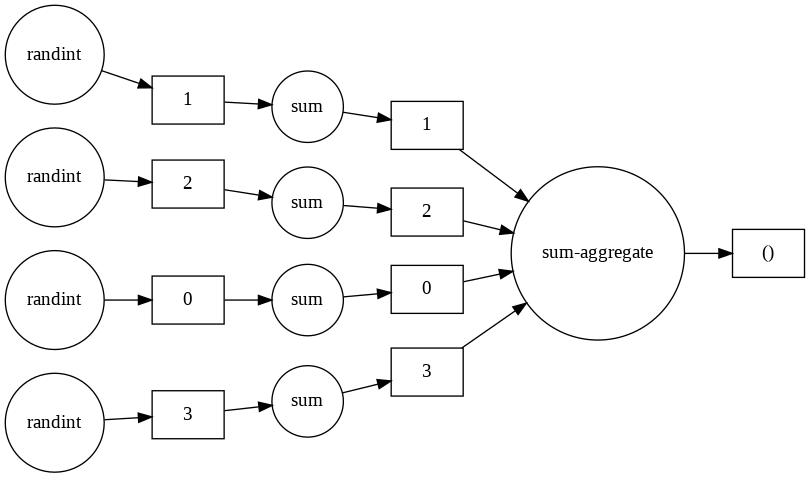

In [8]:
da_arr.sum().visualize(rankdir='LR')

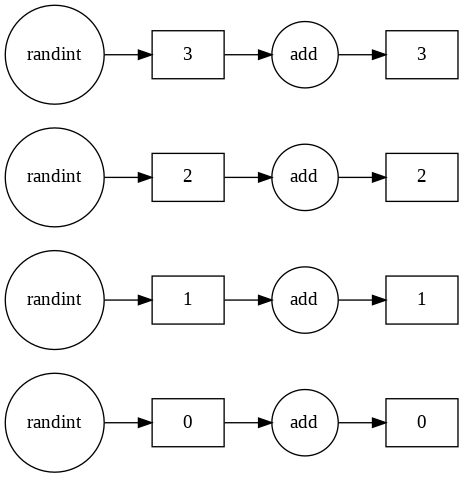

In [9]:
(da_arr+5).visualize(rankdir='LR')

In [10]:
dask_mean=da.mean(da_arr)
dask_mean.compute()

5.8

In [11]:
da_arr

dask.array<randint, shape=(20,), dtype=int64, chunksize=(6,), chunktype=numpy.ndarray>

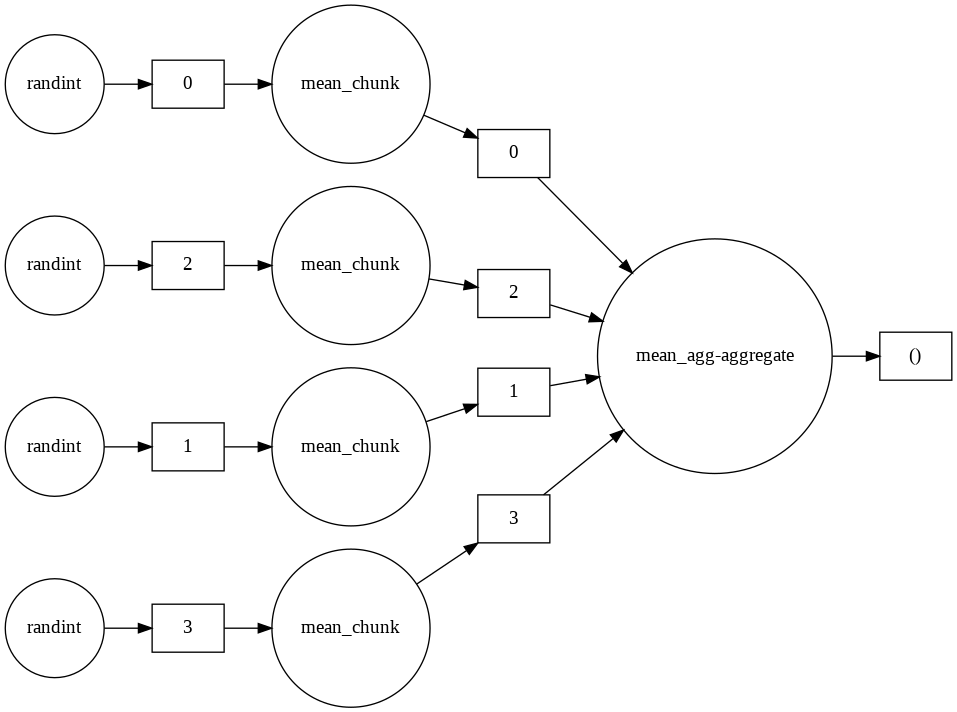

In [12]:
dask_mean.visualize(rankdir='LR')

In [13]:
dask_large=da.random.randint(10000,size=(50000,50000),
                             chunks=(5000,1000))
dask_large

dask.array<randint, shape=(50000, 50000), dtype=int64, chunksize=(5000, 1000), chunktype=numpy.ndarray>

In [14]:
dask_large.nbytes


20000000000

1GB=1e+9

In [15]:
dask_large.nbytes/1e+9

20.0

Regression: y = mx + c
y = Dependent (mx and c is optional)
we need m and c to get y bcz we have x already (x = independent)

In [ ]:
x=da.random.random(10,chunks=10)
y=da.random.random(10,chunks=10)

In [ ]:
x

dask.array<random_sample, shape=(10,), dtype=float64, chunksize=(10,), chunktype=numpy.ndarray>

In [ ]:
y

dask.array<random_sample, shape=(10,), dtype=float64, chunksize=(10,), chunktype=numpy.ndarray>

In [ ]:
sum_x_y=da.add(x,y)
sum_x_y

dask.array<add, shape=(10,), dtype=float64, chunksize=(10,), chunktype=numpy.ndarray>

In [ ]:
sum_x_y.compute()

array([1.21334246, 0.99484922, 1.89348977, 1.04796495, 0.27919363,
       0.98958902, 0.98295972, 0.99451519, 0.2641437 , 1.84260727])

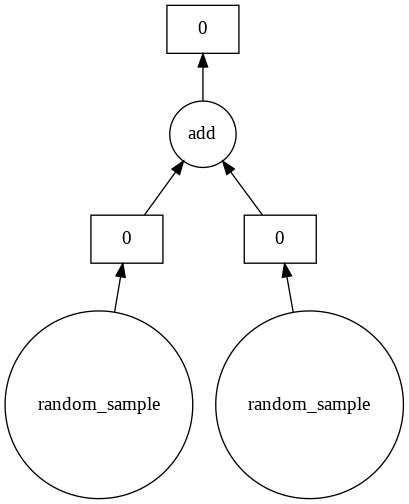

In [ ]:
sum_x_y.visualize()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IceCreamData.csv to IceCreamData.csv


In [16]:
import pandas as pd
import seaborn as sns

In [17]:
df1=pd.read_csv('IceCreamData.csv')
df1

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


After Getting any dataset , we must try to find two things
1.independent variable 
2. dependent variable

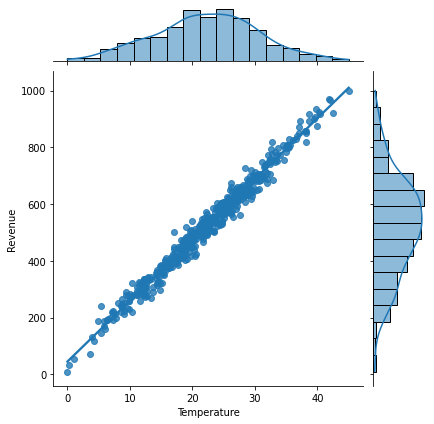

In [19]:
sns.jointplot(x='Temperature',y='Revenue',data=df1,kind='reg')

After Successful Completion of EDA , We Can Find that the trend of the data going to statisfy y = mx + c
y= Dependent Variable (Revenue)
x= Independent variable ( Temp)
m & c?
coefficient & intercept 

After Considering X & y we have to divide our data into two segment 
1. training data 
2. testing data 

In [20]:
y=df1[['Revenue']]
X=df1[['Temperature']]

In [23]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [22]:
y

,Revenue
0,534.799028
1,625.190122
2,660.632289
3,487.706960
4,316.240194
...,...
495,524.746364
496,755.818399
497,306.090719
498,566.217304


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.26)

In [26]:
X_test

,Temperature
311,12.270967
269,24.778199
156,18.880356
175,20.556679
25,18.978300
...,...
484,4.865874
205,16.145824
24,23.881725
12,18.811824


In [27]:
X_train

,Temperature
472,22.225122
487,32.632858
142,32.409242
480,22.482798
64,20.511637
...,...
486,12.301615
128,31.412629
391,12.433140
177,26.943638


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
l1=LinearRegression(fit_intercept=True)

from 500 rows , we have cut down 26% means 130 rows from Mother data,So internal alignment of the csv file totally destroyed. 
no problem with X_test and y_test because we newly created this , but remaining 370 rows available in x_train & y_train part but in disordered format.

In [30]:
l1.fit(X_train,y_train)

LinearRegression()

In [31]:
print('Linear Model Coefficient(m):',l1.coef_)
print('Linear Model Coefficient(c):',l1.intercept_)

Linear Model Coefficient(m): [[21.54958026]]
Linear Model Coefficient(c): [42.32502336]


In [32]:
df1.tail(3)

,Temperature,Revenue
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


y = 21.52626413*12.588157 + 42.74442232 = 313.720 INR

In [33]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df2=pd.read_csv('Employee_Salary.csv')
df2

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448
...,...,...
1995,19.178575,421534.69100
1996,19.254499,430478.02650
1997,19.353369,438090.84540
1998,19.842520,482242.16080


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


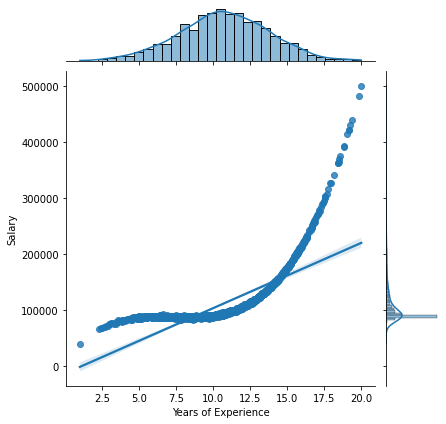

In [ ]:
sns.jointplot(x='Years of Experience',y='Salary',data=df2,kind='reg')

In [ ]:
X=df2[['Years of Experience']] # Indepenent
y=df2[['Salary']] # Dependent

In [ ]:
X_train=X
y_train=y

In [ ]:
l2=LinearRegression(fit_intercept=True)


In [ ]:
l2.fit(X_train,y_train)

LinearRegression()

In [ ]:
print('Linear Model Coefficient(m):',l2.coef_)
print('Linear Model Coefficient(c):',l2.intercept_)

Linear Model Coefficient(m): [[11640.22916165]]
Linear Model Coefficient(c): [-13063.09931519]


In [ ]:
df2.head(5)

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_feature=PolynomialFeatures(degree=2)#Ref Based on Graph

In [ ]:
X_train

,Years of Experience
0,1.000000
1,2.257942
2,2.450875
3,2.498713
4,2.613729
...,...
1995,19.178575
1996,19.254499
1997,19.353369
1998,19.842520


In [ ]:
y_train

,Salary
0,40000.00000
1,65979.42119
2,67253.57549
3,67342.43510
4,70532.20448
...,...
1995,421534.69100
1996,430478.02650
1997,438090.84540
1998,482242.16080


In [ ]:
X_columns=poly_feature.fit_transform(X_train)
X_columns

array([[  1.        ,   1.        ,   1.        ],
       [  1.        ,   2.25794198,   5.09830199],
       [  1.        ,   2.45087546,   6.00679053],
       ...,
       [  1.        ,  19.35336879, 374.55288352],
       [  1.        ,  19.84251968, 393.72558725],
       [  1.        ,  20.        , 400.        ]])

In [ ]:
l3=LinearRegression()

In [ ]:
l3.fit(X_columns,y_train)

LinearRegression()

In [ ]:
print('Linear Model Coefficient(m):',l3.coef_)
print('Linear Model Coefficient(c):',l3.intercept_)

Linear Model Coefficient(m): [[     0.         -33106.32895617   2095.78613853]]
Linear Model Coefficient(c): [207045.95366531]


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving EconomiesOfScale.csv to EconomiesOfScale.csv


In [ ]:
df3=pd.read_csv('EconomiesOfScale.csv')
df3

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


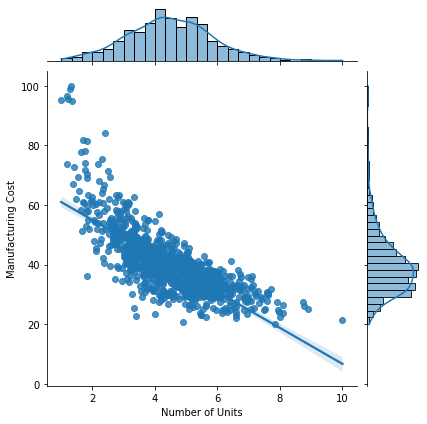

In [ ]:
sns.jointplot(x='Number of Units',y='Manufacturing Cost',data=df3,kind='reg')

In [37]:
#01-04-2022
#01/04/2022
#01-04-22
#01/04/22
#1st April 2022
#04-01-2022

In [36]:
'''india
srilanka
bangladesh'''

'india\nsrilanka\nbangladesh'

In [35]:
"""        
India       1 0 0 0 0
Bangladesh  0 1 0 0 0
Srilanka    0 0 1 0 0
china       0 0 0 1 0
mynmr       0 0 0 0 1 
#Feature Scaling """

'        \nIndia       1 0 0 0 0\nBangladesh  0 1 0 0 0\nSrilanka    0 0 1 0 0\nchina       0 0 0 1 0\nmynmr       0 0 0 0 1 \n#Feature Scaling '